Problem Statement

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

Load Libraries


In [645]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Loads and read files

In [646]:
#read files
#Reading train file:
train = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Titanic-Datasets/master/titanic_train.csv')
#Reading test file:
test = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Titanic-Datasets/master/titanic_test.csv')
#Reading gender file:
gender_file = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Titanic-Datasets/master/gender_submission.csv')

In [647]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [648]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [649]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Define X_tot and y

In [650]:
y = train.Survived
train_less_y = train.drop(['Survived'], axis=1)
train_less_y

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [651]:
X_tot = train_less_y.append(test)
X_tot = X_tot.drop(['PassengerId'], axis=1)
X_tot

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [652]:
X_tot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1308 non-null   float64
 8   Cabin     295 non-null    object 
 9   Embarked  1307 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 112.5+ KB


Check for null values

In [653]:
X_tot.isnull().sum()

Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

Drop cabin

In [654]:
X_tot = X_tot.drop(['Cabin', 'Ticket'], axis=1)
X_tot

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S


In [655]:
X_tot.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

Replace null values with 0

In [656]:
X_tot.fillna(0)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,0.0,0,0,8.0500,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S
416,3,"Ware, Mr. Frederick",male,0.0,0,0,8.0500,S


Check for null values

In [657]:
X_tot.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

In [658]:
X_tot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Embarked  1307 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 92.0+ KB


Impute

In [659]:
X_tot['Age'] = X_tot['Age'].fillna(X_tot['Age'].median())

In [660]:
X_tot['Fare'] = X_tot['Fare'].fillna(X_tot['Fare'].median())

In [661]:
X_tot['Embarked'] = X_tot['Embarked'].fillna(X_tot['Embarked'].mode()[0])

In [662]:
X_tot.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Perform analysis

Survived

In [663]:
survived = train.groupby('Survived').Survived.count()
survived

Survived
0    549
1    342
Name: Survived, dtype: int64

In [664]:
percent_survived = (survived / len(train)) * 100
percent_survived

Survived
0    61.616162
1    38.383838
Name: Survived, dtype: float64

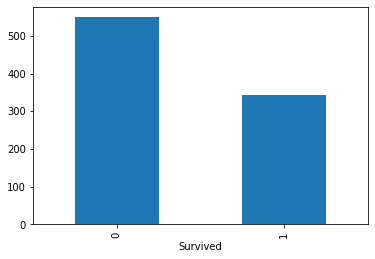

In [665]:
train.groupby('Survived').Survived.count().plot.bar(ylim=0)
plt.show()

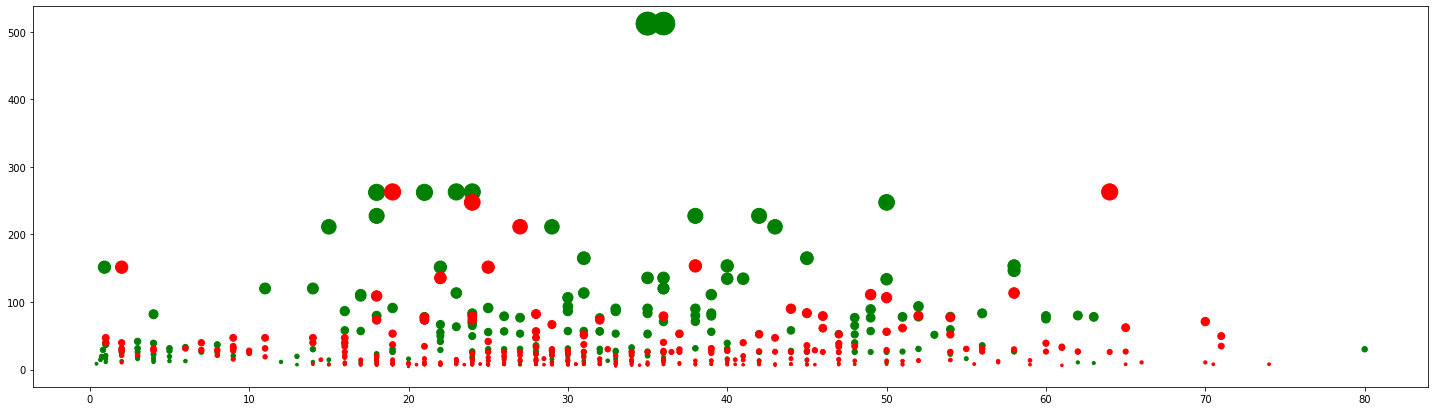

In [666]:
plt.figure(figsize=(25, 7))
ax = plt.subplot()
ax.scatter(train[train['Survived'] == 1]['Age'], train[train['Survived'] == 1]['Fare'], c='green', s=train[train['Survived'] == 1]['Fare'])
ax.scatter(train[train['Survived'] == 0]['Age'], train[train['Survived'] == 0]['Fare'], c='red', s=train[train['Survived'] == 0]['Fare']);

Heatmap

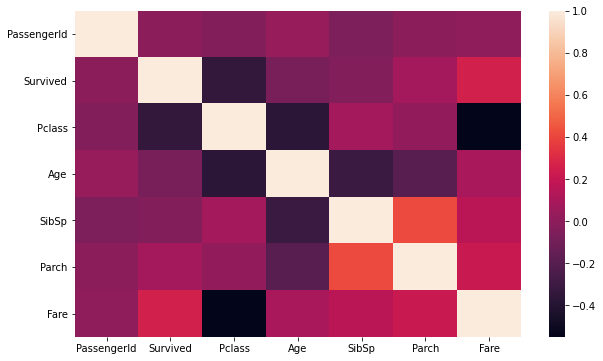

In [667]:
#create a heatmap to correlate promotion
plt.figure(figsize=(10,6))
cmap=train.corr()
sns.heatmap(cmap)

Title

In [668]:
#take title from name
X_tot['Title'] = X_tot['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())

In [669]:
title = X_tot.Title.value_counts()
title

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Ms                2
Major             2
Mlle              2
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Mme               1
Lady              1
Sir               1
Name: Title, dtype: int64

In [670]:
title1={'Capt':1, 'Col':2, 'Don':3, 'Dr':4,'Jonkheer':5, 'Lady':6, 'Major': 7, 'Master':8, 'Miss':9, 
        'Mlle':10, 'Mme':11, 'Mr':12, 'Mrs':13, 'Ms':14, 'Rev':15, 'Sir':16, 'the Countess':17, 'Dona':18}
X_tot.Title = X_tot.Title.map(title1)

Sex

In [671]:
sex = X_tot.groupby('Sex').Sex.count()
sex

Sex
female    466
male      843
Name: Sex, dtype: int64

In [672]:
percent_sex = (sex / len(X_tot)) * 100
percent_sex

Sex
female    35.599694
male      64.400306
Name: Sex, dtype: float64

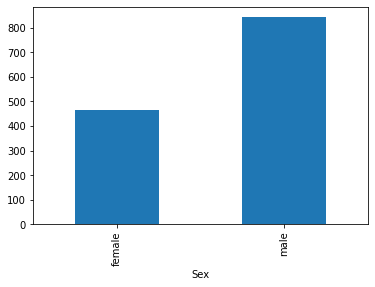

In [673]:
X_tot.groupby('Sex').Sex.count().plot.bar(ylim=0)
plt.show()

Passenger class

In [674]:
pclass = X_tot.groupby('Pclass').Pclass.count()
pclass

Pclass
1    323
2    277
3    709
Name: Pclass, dtype: int64

In [675]:
percent_class = (pclass / len(X_tot)) * 100
percent_class

Pclass
1    24.675325
2    21.161192
3    54.163484
Name: Pclass, dtype: float64

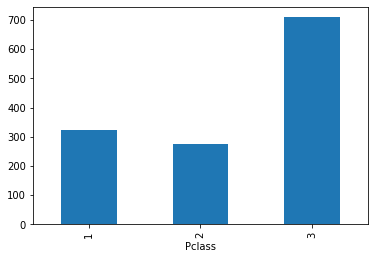

In [676]:
X_tot.groupby('Pclass').Pclass.count().plot.bar(ylim=0)
plt.show()

Age

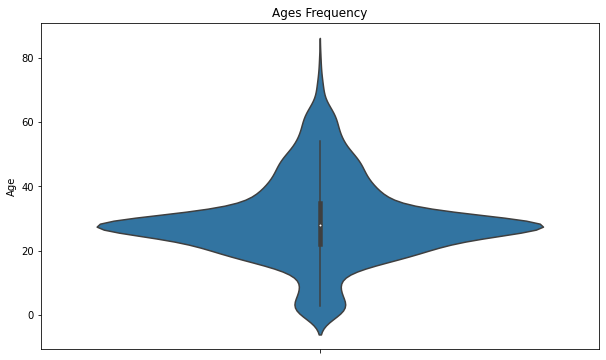

In [677]:
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=X_tot["Age"])
plt.show()

In [678]:
max_age = X_tot.Age.max()
max_age

80.0

In [679]:
min_age = X_tot.Age.min()
min_age

0.17

In [680]:
median_age = X_tot.Age.median()
median_age

28.0

In [681]:
most_age = X_tot.Age.mode()
most_age

0    28.0
dtype: float64

Fare

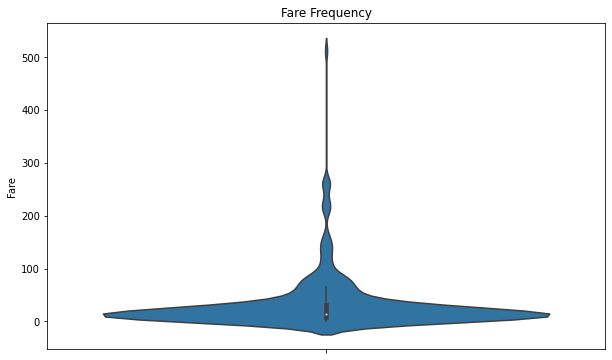

In [682]:
plt.figure(figsize=(10,6))
plt.title("Fare Frequency")
sns.axes_style("dark")
sns.violinplot(y=X_tot["Fare"])
plt.show()

In [683]:
max_fare = X_tot.Fare.max()
max_fare

512.3292

In [684]:
min_fare = X_tot.Fare.min()
min_fare

0.0

In [685]:
median_fare = X_tot.Fare.median()
median_fare

14.4542

In [686]:
most_fare = X_tot.Fare.mode()
most_fare

0    8.05
dtype: float64

Embarked

In [687]:
embark = X_tot.groupby('Embarked').Embarked.count()
embark

Embarked
C    270
Q    123
S    916
Name: Embarked, dtype: int64

In [688]:
percent_embark = (embark / len(X_tot)) * 100
percent_embark

Embarked
C    20.626432
Q     9.396486
S    69.977082
Name: Embarked, dtype: float64

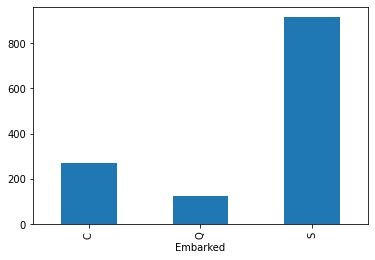

In [689]:
X_tot.groupby('Embarked').Embarked.count().plot.bar(ylim=0)
plt.show()

Ordinal encode categorical columns

In [690]:
sex1={'male':1, 'female':2}
X_tot.Sex=X_tot.Sex.map(sex1)

In [691]:
embark1={'C':1, 'Q':2, 'S':3}
X_tot.Embarked=X_tot.Embarked.map(embark1)

Convert age and fare to integar

In [692]:
X_tot.Age = X_tot.Age.astype(int)

X_tot.Fare = X_tot.Fare.astype(int)

In [693]:
X_tot

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,"Braund, Mr. Owen Harris",1,22,1,0,7,3,12
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38,1,0,71,1,13
2,3,"Heikkinen, Miss. Laina",2,26,0,0,7,3,9
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35,1,0,53,3,13
4,3,"Allen, Mr. William Henry",1,35,0,0,8,3,12
...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",1,28,0,0,8,3,12
414,1,"Oliva y Ocana, Dona. Fermina",2,39,0,0,108,1,18
415,3,"Saether, Mr. Simon Sivertsen",1,38,0,0,7,3,12
416,3,"Ware, Mr. Frederick",1,28,0,0,8,3,12


Define features

In [694]:
features = ["Pclass", "Title", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
X_tot = X_tot[features]
X_tot

,Pclass,Title,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,12,1,22,1,0,7,3
1,1,13,2,38,1,0,71,1
2,3,9,2,26,0,0,7,3
3,1,13,2,35,1,0,53,3
4,3,12,1,35,0,0,8,3
...,...,...,...,...,...,...,...,...
413,3,12,1,28,0,0,8,3
414,1,18,2,39,0,0,108,1
415,3,12,1,38,0,0,7,3
416,3,12,1,28,0,0,8,3


Normalise X_tot

In [695]:
X_tot = (X_tot - X_tot.min()) / (X_tot.max() - X_tot.min())
X_tot

,Pclass,Title,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,0.647059,0.0,0.2750,0.125,0.000000,0.013672,1.0
1,0.0,0.705882,1.0,0.4750,0.125,0.000000,0.138672,0.0
2,1.0,0.470588,1.0,0.3250,0.000,0.000000,0.013672,1.0
3,0.0,0.705882,1.0,0.4375,0.125,0.000000,0.103516,1.0
4,1.0,0.647059,0.0,0.4375,0.000,0.000000,0.015625,1.0
...,...,...,...,...,...,...,...,...
413,1.0,0.647059,0.0,0.3500,0.000,0.000000,0.015625,1.0
414,0.0,1.000000,1.0,0.4875,0.000,0.000000,0.210938,0.0
415,1.0,0.647059,0.0,0.4750,0.000,0.000000,0.013672,1.0
416,1.0,0.647059,0.0,0.3500,0.000,0.000000,0.015625,1.0


Define validation and test sets

In [696]:
rows = len(train)

X_train = X_tot[:rows]
y_train = y

X_test = X_tot[rows:]

In [697]:
X_train

,Pclass,Title,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,0.647059,0.0,0.2750,0.125,0.000000,0.013672,1.0
1,0.0,0.705882,1.0,0.4750,0.125,0.000000,0.138672,0.0
2,1.0,0.470588,1.0,0.3250,0.000,0.000000,0.013672,1.0
3,0.0,0.705882,1.0,0.4375,0.125,0.000000,0.103516,1.0
4,1.0,0.647059,0.0,0.4375,0.000,0.000000,0.015625,1.0
...,...,...,...,...,...,...,...,...
886,0.5,0.823529,0.0,0.3375,0.000,0.000000,0.025391,1.0
887,0.0,0.470588,1.0,0.2375,0.000,0.000000,0.058594,1.0
888,1.0,0.470588,1.0,0.3500,0.125,0.222222,0.044922,1.0
889,0.0,0.647059,0.0,0.3250,0.000,0.000000,0.058594,0.0


In [698]:
X_test

,Pclass,Title,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,0.647059,0.0,0.4250,0.000,0.000000,0.013672,0.5
1,1.0,0.705882,1.0,0.5875,0.125,0.000000,0.013672,1.0
2,0.5,0.647059,0.0,0.7750,0.000,0.000000,0.017578,0.5
3,1.0,0.647059,0.0,0.3375,0.000,0.000000,0.015625,1.0
4,1.0,0.705882,1.0,0.2750,0.125,0.111111,0.023438,1.0
...,...,...,...,...,...,...,...,...
413,1.0,0.647059,0.0,0.3500,0.000,0.000000,0.015625,1.0
414,0.0,1.000000,1.0,0.4875,0.000,0.000000,0.210938,0.0
415,1.0,0.647059,0.0,0.4750,0.000,0.000000,0.013672,1.0
416,1.0,0.647059,0.0,0.3500,0.000,0.000000,0.015625,1.0


Select model

Radius Neighbours

In [699]:
from sklearn.neighbors import RadiusNeighborsClassifier

model = RadiusNeighborsClassifier(radius=20, weights='distance').fit(X_train, y_train)
print(model.score(X_train, y_train))

0.9640852974186308


Predict on validation set

In [700]:
prediction = model.predict(X_test)
prediction

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Prepare and submit

In [701]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': prediction})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [702]:
#upload submission
submission = pd.read_csv("submission.csv")
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0
